In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset : Bank Dataset

## Problem Statement

-----

>Output variable -> y

>y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

>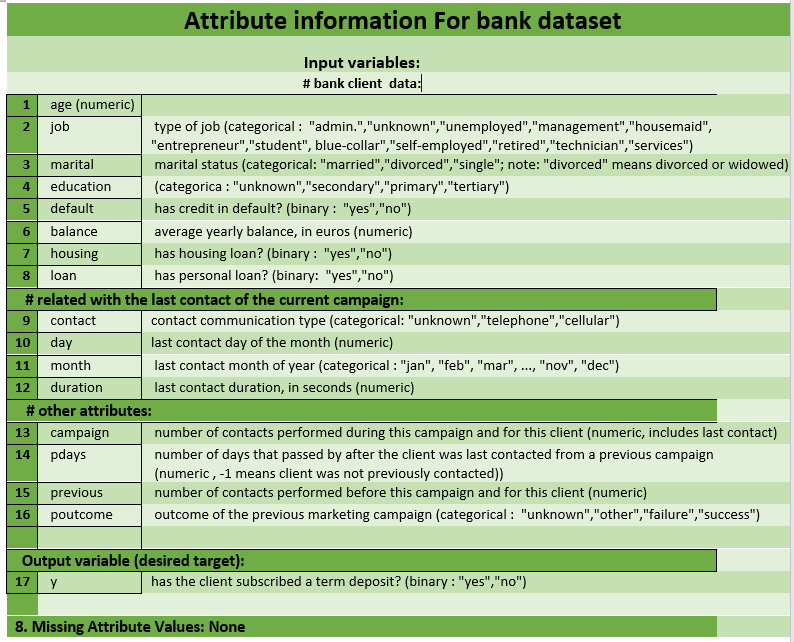


In [2]:
df = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A6 Logistic Regression\\bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Counts of all the variables :

In [4]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

> subscribed a term deposit = "Yes"

> not subscribed a term deposit  = "No"


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
for i in df.columns:
    print(i, '\n', df[i].value_counts(),'\n', '\n')

age 
 32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64 
 

job 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 
 

marital 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 
 

education 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 
 

default 
 no     44396
yes      815
Name: default, dtype: int64 
 

balance 
  0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64 
 

housing 
 yes    25130
no   

## Unique values of all the variables :

In [7]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
balance: [ 2143    29     2 ...  8205 14204 16353]
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [ 261  151   76 ... 1298 1246 1556]
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 3

<AxesSubplot:>

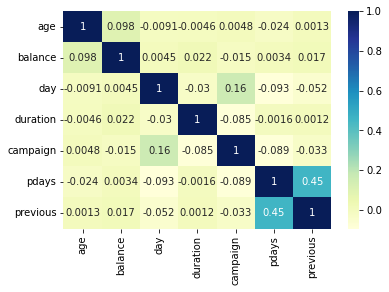

In [8]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

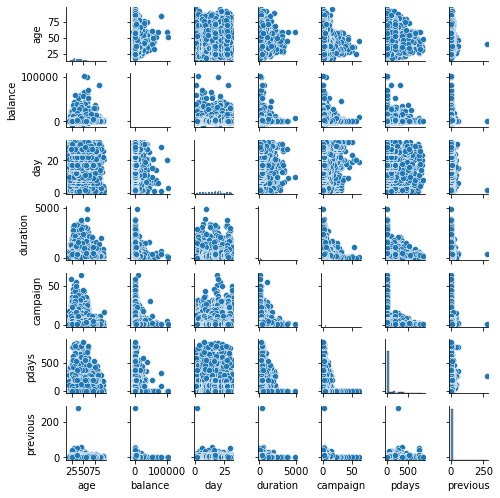

In [9]:
sns.pairplot(data = df, height = 1)

## Data Cleaning :

> Cleaning the data Variable-wise

## Droping Unnecessary Column :

In [10]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [11]:
df = df.drop(["day"],axis = 1)

## Default

In [12]:
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [13]:
df.drop(['default'],axis=1, inplace=True)

In [14]:
df.replace({'month' : { "jan" : 1,"feb" : 2 , "mar":3, "apr" :4  ,  "may" :5 ,"jun" : 6, 
                       "jul" : 7, "aug" : 8, "sep" : 9,"oct" : 10, "nov" : 11 ,"dec" : 12}})

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,no,cellular,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,11,508,4,-1,0,unknown,no


## P-days

>-1 means client was not previously contacted

In [15]:
df.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

>  drop pdays as it has -1 value for around 40%+

In [16]:
df.drop(['pdays'],axis=1, inplace=True)

## Age

In [17]:
df.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [18]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_cat"] = "18 to 30"
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_cat"] = "30 to 40"
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_cat"] = "40 to 50 "
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_cat"] = "50 to 60"
    column.loc[column["age"] >= 60, "age_cat"] = "60 & above"
df['age_cat'] = df['age_cat']

In [19]:
df.insert(0, 'Age_cat',value=df['age_cat'])

In [20]:
df=df.drop(['age','age_cat'], axis=1)
df

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,50 to 60,management,married,tertiary,2143,yes,no,unknown,may,261,1,0,unknown,no
1,40 to 50,technician,single,secondary,29,yes,no,unknown,may,151,1,0,unknown,no
2,30 to 40,entrepreneur,married,secondary,2,yes,yes,unknown,may,76,1,0,unknown,no
3,40 to 50,blue-collar,married,unknown,1506,yes,no,unknown,may,92,1,0,unknown,no
4,30 to 40,unknown,single,unknown,1,no,no,unknown,may,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,50 to 60,technician,married,tertiary,825,no,no,cellular,nov,977,3,0,unknown,yes
45207,60 & above,retired,divorced,primary,1729,no,no,cellular,nov,456,2,0,unknown,yes
45208,60 & above,retired,married,secondary,5715,no,no,cellular,nov,1127,5,3,success,yes
45209,50 to 60,blue-collar,married,secondary,668,no,no,telephone,nov,508,4,0,unknown,no


## Balance

In [21]:
df.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

>As Balance is high , Client shows interest in deposite

### Convert duration to minutes of conversation

In [22]:
decimal_points = 2
df['duration'] = df['duration'] / 60
df['duration'] = df['duration'].apply(lambda x: round(x, decimal_points))

In [23]:
df.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0.00         3
     0.02         2
     0.03         3
     0.05         4
     0.07        15
                 ..
yes  51.57        1
     51.70        1
     53.05        1
     54.22        1
     64.68        1
Name: duration, Length: 2627, dtype: int64

<AxesSubplot:ylabel='duration'>

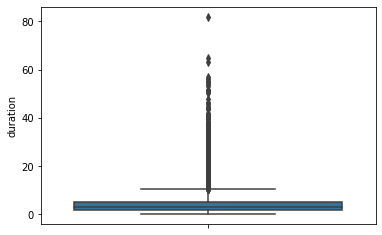

In [24]:
sns.boxplot(y="duration", data=df)

In [25]:
df.drop(df[df['duration']>3000].index,inplace=True,axis=0)

In [26]:
Q1 = df.duration.quantile(0.25)
Q3 = df.duration.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df.duration>lower_limit)&(df.duration<upper_limit)] 

<AxesSubplot:ylabel='duration'>

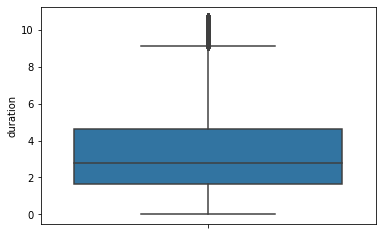

In [27]:
sns.boxplot(y="duration", data=df)

## Campaign

In [28]:
pd.set_option('display.max_rows', 500)

In [29]:
df.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14427
     2           10612
     3            4670
     4            3081
     5            1565
     6            1160
     7             664
     8             489
     9             295
     10            246
     11            181
     12            144
     13            121
     14             87
     15             78
     16             76
     17             61
     18             51
     19             43
     20             41
     21             33
     22             23
     23             22
     24             18
     25             21
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
     33              6
     34              5
     35              4
     36              4
     37              2
     38              3
     39              1
     41              2
     43              3
     44              1
     46             

In [30]:
df=df[df['campaign'] < 33]

## Previous

In [31]:
df.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           32156
     1            2112
     2            1605
     3             811
     4             521
     5             327
     6             188
     7             146
     8              86
     9              65
     10             38
     11             49
     12             33
     13             29
     14             14
     15             18
     16             13
     17             12
     18              5
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
     41              1
     51              1
     275             1
yes  0            2044
     1             483
     2             383
     3             2

In [32]:
df=df[df['previous'] < 58]

In [33]:
df.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           32156
     1            2112
     2            1605
     3             811
     4             521
     5             327
     6             188
     7             146
     8              86
     9              65
     10             38
     11             49
     12             33
     13             29
     14             14
     15             18
     16             13
     17             12
     18              5
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
     41              1
     51              1
yes  0            2044
     1             483
     2             383
     3             245
     4             1

# Data-information after Cleaning

In [34]:
df

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,50 to 60,management,married,tertiary,2143,yes,no,unknown,may,4.35,1,0,unknown,no
1,40 to 50,technician,single,secondary,29,yes,no,unknown,may,2.52,1,0,unknown,no
2,30 to 40,entrepreneur,married,secondary,2,yes,yes,unknown,may,1.27,1,0,unknown,no
3,40 to 50,blue-collar,married,unknown,1506,yes,no,unknown,may,1.53,1,0,unknown,no
4,30 to 40,unknown,single,unknown,1,no,no,unknown,may,3.30,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,60 & above,retired,married,secondary,2850,no,no,cellular,nov,5.00,1,8,failure,yes
45205,18 to 30,technician,single,secondary,505,no,yes,cellular,nov,6.43,2,0,unknown,yes
45207,60 & above,retired,divorced,primary,1729,no,no,cellular,nov,7.60,2,0,unknown,yes
45209,50 to 60,blue-collar,married,secondary,668,no,no,telephone,nov,8.47,4,0,unknown,no


In [35]:
x = df[df.duplicated()]
x

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
15974,30 to 40,management,married,tertiary,0,no,no,cellular,jul,1.48,1,0,unknown,no
22148,30 to 40,technician,single,tertiary,0,no,no,cellular,aug,2.02,2,0,unknown,no
22577,30 to 40,technician,single,tertiary,0,no,no,cellular,aug,2.02,2,0,unknown,no
23851,30 to 40,management,single,tertiary,0,no,no,cellular,aug,2.25,2,0,unknown,no


In [36]:
df = df.drop_duplicates()

In [37]:
df.shape

(41921, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41921 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_cat    41921 non-null  object 
 1   job        41921 non-null  object 
 2   marital    41921 non-null  object 
 3   education  41921 non-null  object 
 4   balance    41921 non-null  int64  
 5   housing    41921 non-null  object 
 6   loan       41921 non-null  object 
 7   contact    41921 non-null  object 
 8   month      41921 non-null  object 
 9   duration   41921 non-null  float64
 10  campaign   41921 non-null  int64  
 11  previous   41921 non-null  int64  
 12  poutcome   41921 non-null  object 
 13  y          41921 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.8+ MB


In [39]:
df.isnull().sum()

Age_cat      0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64

# Logistic Regression

> There is a variable named Y is our target variables and others are our independent variables 

> Here, the target variable is binary variable means it has only two outputs.
so we,will use Logistic regression for predicting Y Variable 


In [40]:
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
dic = {"yes":1,"no":0}
lst = ['y',"loan","housing"]
for i in lst:
    df[i] = df[i].map(dic)

C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_25436/3247978960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map(dic)


In [41]:
l=["contact","poutcome"]
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].values)

C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_25436/1215688319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i].values)


In [42]:
df.head(10)

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,50 to 60,management,married,tertiary,2143,1,0,2,may,4.35,1,0,3,0
1,40 to 50,technician,single,secondary,29,1,0,2,may,2.52,1,0,3,0
2,30 to 40,entrepreneur,married,secondary,2,1,1,2,may,1.27,1,0,3,0
3,40 to 50,blue-collar,married,unknown,1506,1,0,2,may,1.53,1,0,3,0
4,30 to 40,unknown,single,unknown,1,0,0,2,may,3.30,1,0,3,0
5,30 to 40,management,married,tertiary,231,1,0,2,may,2.32,1,0,3,0
6,18 to 30,management,single,tertiary,447,1,1,2,may,3.62,1,0,3,0
7,40 to 50,entrepreneur,divorced,tertiary,2,1,0,2,may,6.33,1,0,3,0
8,50 to 60,retired,married,primary,121,1,0,2,may,0.83,1,0,3,0
9,40 to 50,technician,single,secondary,593,1,0,2,may,0.92,1,0,3,0


In [43]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,50 to 60,management,married,tertiary,2143,1,0,2,may,4.35,1,0,3
1,40 to 50,technician,single,secondary,29,1,0,2,may,2.52,1,0,3
2,30 to 40,entrepreneur,married,secondary,2,1,1,2,may,1.27,1,0,3
3,40 to 50,blue-collar,married,unknown,1506,1,0,2,may,1.53,1,0,3
4,30 to 40,unknown,single,unknown,1,0,0,2,may,3.30,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,60 & above,retired,married,secondary,2850,0,0,0,nov,5.00,1,8,0
45205,18 to 30,technician,single,secondary,505,0,1,0,nov,6.43,2,0,3
45207,60 & above,retired,divorced,primary,1729,0,0,0,nov,7.60,2,0,3
45209,50 to 60,blue-collar,married,secondary,668,0,0,1,nov,8.47,4,0,3


In [44]:
X = pd.get_dummies(data = X)
X

,balance,housing,loan,contact,duration,campaign,previous,poutcome,Age_cat_18 to 30,Age_cat_30 to 40,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,2143,1,0,2,4.35,1,0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29,1,0,2,2.52,1,0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,1,1,2,1.27,1,0,3,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1506,1,0,2,1.53,1,0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,2,3.30,1,0,3,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,2850,0,0,0,5.00,1,8,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45205,505,0,1,0,6.43,2,0,3,1,0,...,0,0,0,0,0,0,0,1,0,0
45207,1729,0,0,0,7.60,2,0,3,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,668,0,0,1,8.47,4,0,3,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
X.shape , Y.shape

((41921, 44), (41921,))

## Logistic regression and fit the model

In [46]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = classifier.predict(X)

In [48]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45204,1,1
45205,1,0
45207,1,1
45209,0,0


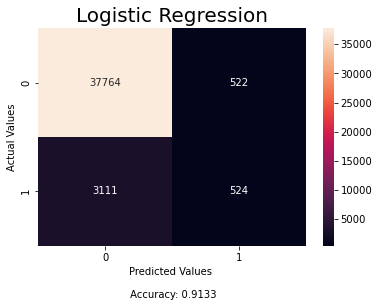

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy=accuracy_score(Y, y_pred)

plt.title('Logistic Regression', size = 20)

# Adding figure labels
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(accuracy, 4)))
plt.show()

In [73]:
accuracy_score(Y, y_pred)*100

91.33369910068939

In [53]:
pd.Series(Y).value_counts()

0    38286
1     3635
Name: y, dtype: int64

In [54]:
pd.Series(y_pred).value_counts()

0    40875
1     1046
dtype: int64

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     38286
           1       0.50      0.14      0.22      3635

    accuracy                           0.91     41921
   macro avg       0.71      0.57      0.59     41921
weighted avg       0.89      0.91      0.89     41921



In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

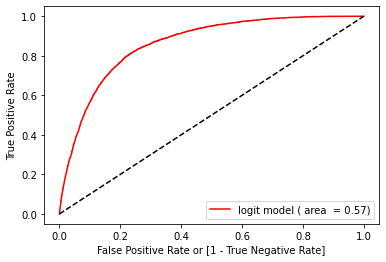

In [57]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [58]:
auc

0.5652599155807077

In [59]:
import statsmodels.api as sm

sm.Logit(Y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.202544
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41921
Model:                          Logit   Df Residuals:                    41881
Method:                           MLE   Df Model:                           39
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3131
Time:                        11:58:58   Log-Likelihood:                -8490.8
converged:                       True   LL-Null:                       -12361.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
balance              1.173e-05   5.54e-06      2.118      0.034    8.73e-07    2.26e-05
housing                -0.8965      0.050    -17.915      0.000      -0.995      -0.798
loan                   -0.7560      0.076     -9.949      0.000      -0.905      -0.607
contact                -0.9161      0.042    -21.810      0.000      -0.998      -0.834
duration                0.3813      0.008     47.737      0.000       0.366       0.397
campaign               -0.1380      0.013    -10.283      0.000      -0.164      -0.112
previous                0.1138      0.009     12.558      0.000       0.096       0.132
poutcome               -0.0095      0.022     -0.425      0.671      -0.053       0.034
Age_cat_18 to 30       -0.3991        nan        nan        nan         nan         nan
Age_cat_30 to 40       -0.8610        nan        nan        nan         nan         nan
Age_cat_40 to 50       -0.8521        nan        nan        nan         nan         nan
Age_cat_50 to 60       -0.8152        nan        nan        nan         nan         nan
Age_cat_60 & above      0.3675        nan        nan        nan         nan         nan
job_admin.              0.0441        nan        nan        nan         nan         nan
job_blue-collar        -0.3995        nan        nan        nan         nan         nan
job_entrepreneur       -0.4974        nan        nan        nan         nan         nan
job_housemaid          -0.4187        nan        nan        nan         nan         nan
job_management         -0.1294        nan        nan        nan         nan         nan
job_retired            -0.2795        nan        nan        nan         nan         nan
job_self-employed      -0.2877        nan        nan        nan         nan         nan
job_services           -0.2286        nan        nan        nan         nan         nan
job_student             0.3153        nan        nan        nan         nan         nan
job_technician         -0.1084        nan        nan        nan         nan         nan
job_unemployed         -0.0992        nan        nan        nan         nan         nan
job_unknown            -0.4709        nan        nan        nan         nan         nan
marital_divorced       -0.8258   6.66e+05  -1.24e-06      1.000   -1.31e+06    1.31e+06
marital_married        -0.9465   6.66e+05  -1.42e-06      1.000   -1.31e+06    1.31e+06
marital_single         -0.7876   6.66e+05  -1.18e-06      1.000   -1.31e+06    1.31e+06
education_primary      -0.9860        nan        nan        nan         nan         nan
education_secondary    -0.6775        nan        nan        nan         nan         nan
education_tertiary     -0.3805        nan        nan        nan         nan         nan
education_unknown      -0.5159        nan        nan        nan         nan         nan
month_apr              -0.1999    1.8e+06  -1.11e-07      1.000   -3.53e+06    3.53e+06
month_aug              -1.0492    1.8e+06  -5.83e-07      1.000   -3.53e+

# Model Validation Techniques :

> 1. Hold Out cross validation Method 

> 2. K-Fold cross validation Method

> 3. Leave One Out cross validation method

## 1. Hold out cross validation 

>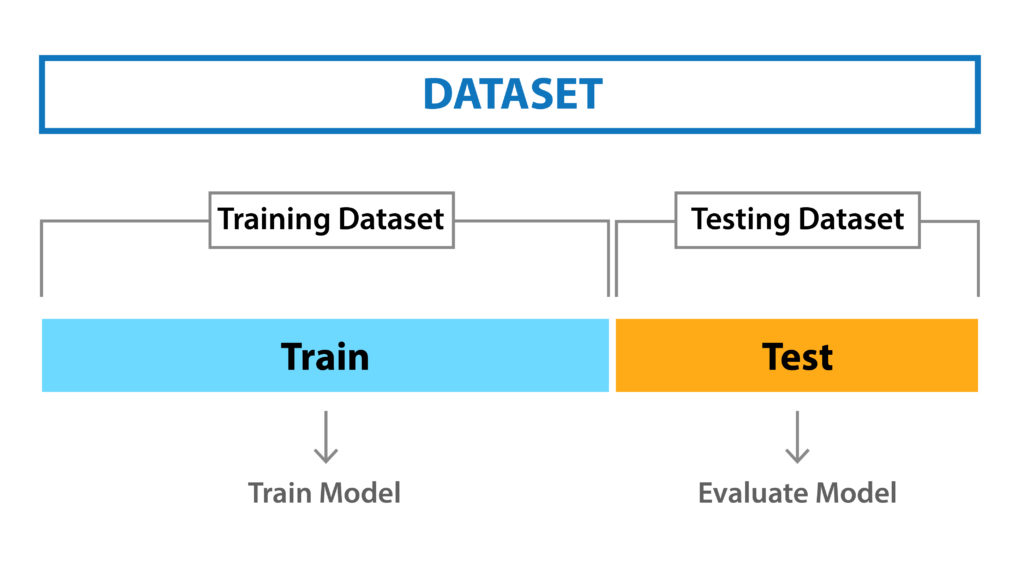

In [60]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [61]:
model = LogisticRegression(max_iter=500)
model.fit(X,Y)

LogisticRegression(max_iter=500)

In [62]:
y_pred1 = model.predict(x_test)
y_pred1.shape

(8385,)

In [63]:
pd.Series(y_pred1).value_counts()

0    8114
1     271
dtype: int64

In [64]:
prediction=[round(value) for value in y_pred1]

In [65]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.40%


> The accuracy of the model comes out to be 91.40% which is good

In [66]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': model.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45204,1,1
45205,1,0
45207,1,0
45209,0,0


In [67]:
Classification_report = classification_report(y_test,y_pred1)
clsreport = print(Classification_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7643
           1       0.54      0.20      0.29       742

    accuracy                           0.91      8385
   macro avg       0.73      0.59      0.62      8385
weighted avg       0.89      0.91      0.90      8385



### ROC[receiver operating characteristic] Curve:

Text(0, 0.5, 'True Positive Rate')

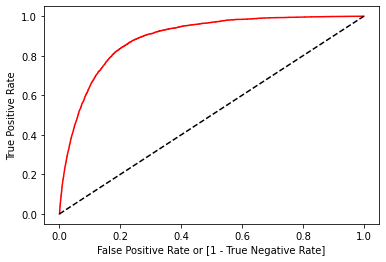

In [68]:

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred1)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### AUC[Area Under the ROC] Curve

In [69]:
auc*100

59.020533208160806

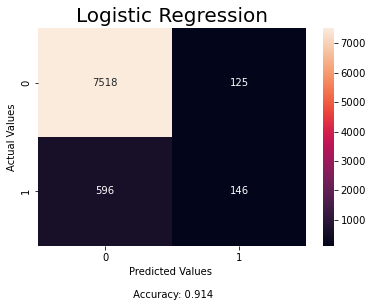

In [70]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, fmt='g', annot=True)
accuracy=accuracy_score(y_test, y_pred1)

plt.title('Logistic Regression', size = 20)

# Adding figure labels
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(accuracy, 4)))
plt.show()

## 2. K-folds-cross-validation

>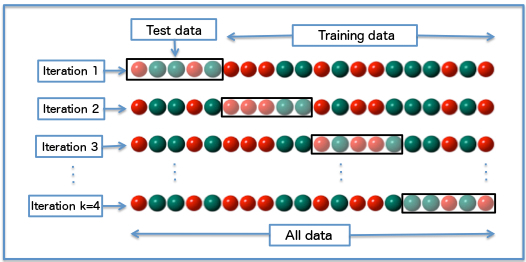

In [71]:
scores = cross_val_score(model,X,Y, cv=10)
scores

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

array([0.91342714, 0.91722328, 0.89432252, 0.89312977, 0.91722328,
       0.92247137, 0.89933206, 0.6865458 , 0.91340649, 0.76192748])

In [74]:
scores.mean()*100

87.19009201540919

>The accuracy of the model comes out to be 87.19% which is slightly lower than the holding out method.

## 3. Leave one out cross validation

>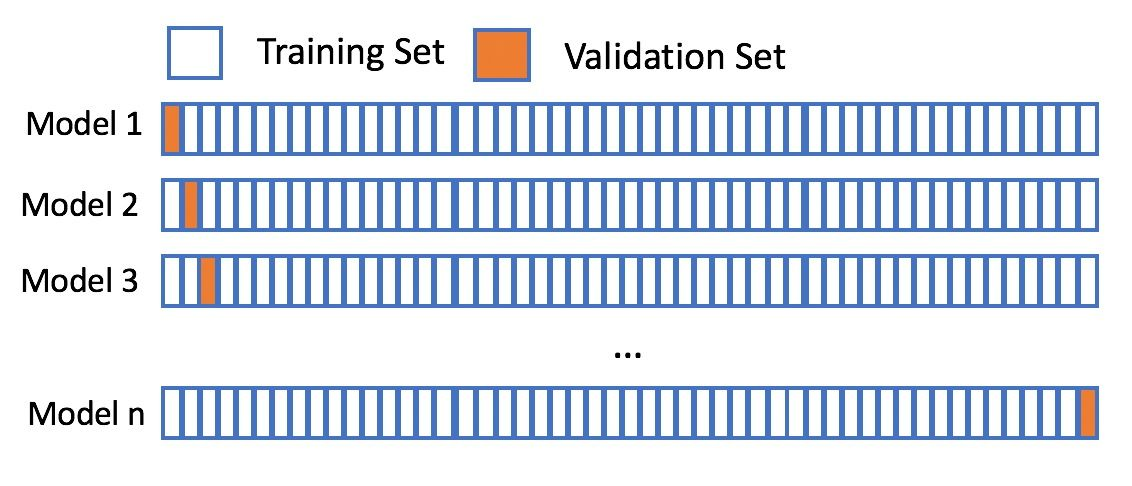

In [ ]:
# scores1 = cross_val_score(model, X, Y, cv=LeaveOneOut())
# print(scores1)

In [ ]:
# scores1.mean()*100